In [357]:
import os, sys
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import matplotlib.animation as manimation
from celluloid import Camera
plt.rcParams['animation.ffmpeg_path'] = "/Users/Louis.Wicker/miniconda3/bin/ffmpeg"
#plt.rcParams['animation.convert_path'] = '/Users/Louis.Wicker/miniconda3/envs/main/bin/magick'

# See things in the browser...
%matplotlib inline

_reduce_image = False

def read_png(rundir, fhour, plottype, time):
 
# create image filename

    plotname = (plottype % time)
    image_path = os.path.join(run_dir, fhour, plotname)
    
# Read Image 

    img = mpimg.imread(image_path)
    
    if _reduce_image:
        
        (width, height) = (img.width // 2, img.height // 2)
        return img.resize((width, height),PIL.Image.LANCZOS)

    else:
        return img


In [396]:
def plot_panel(time, fhour, rundirs, plottypes, axs = axs):
    
    movie = []

    for t in time:
        images     = []
        titles     = []
        plotlabels = []
        
        print(t)

        for ptype in plottypes:

            for dir in rundirs:

                images.append( read_png(dir, fhour, ptype, t) )
                titles.append(dir)
                plotlabels.append(ptype[:-10].upper())

        for index, ax in enumerate(axs.flat):
            ax.clear()
            ax.imshow(images[index], animated=True)
            ax.set_title('%s     %s' %(os.path.split(titles[index])[-1], plotlabels[index]))
            
            
        movie.append(axs.show())


0


AttributeError: 'numpy.ndarray' object has no attribute 'show'

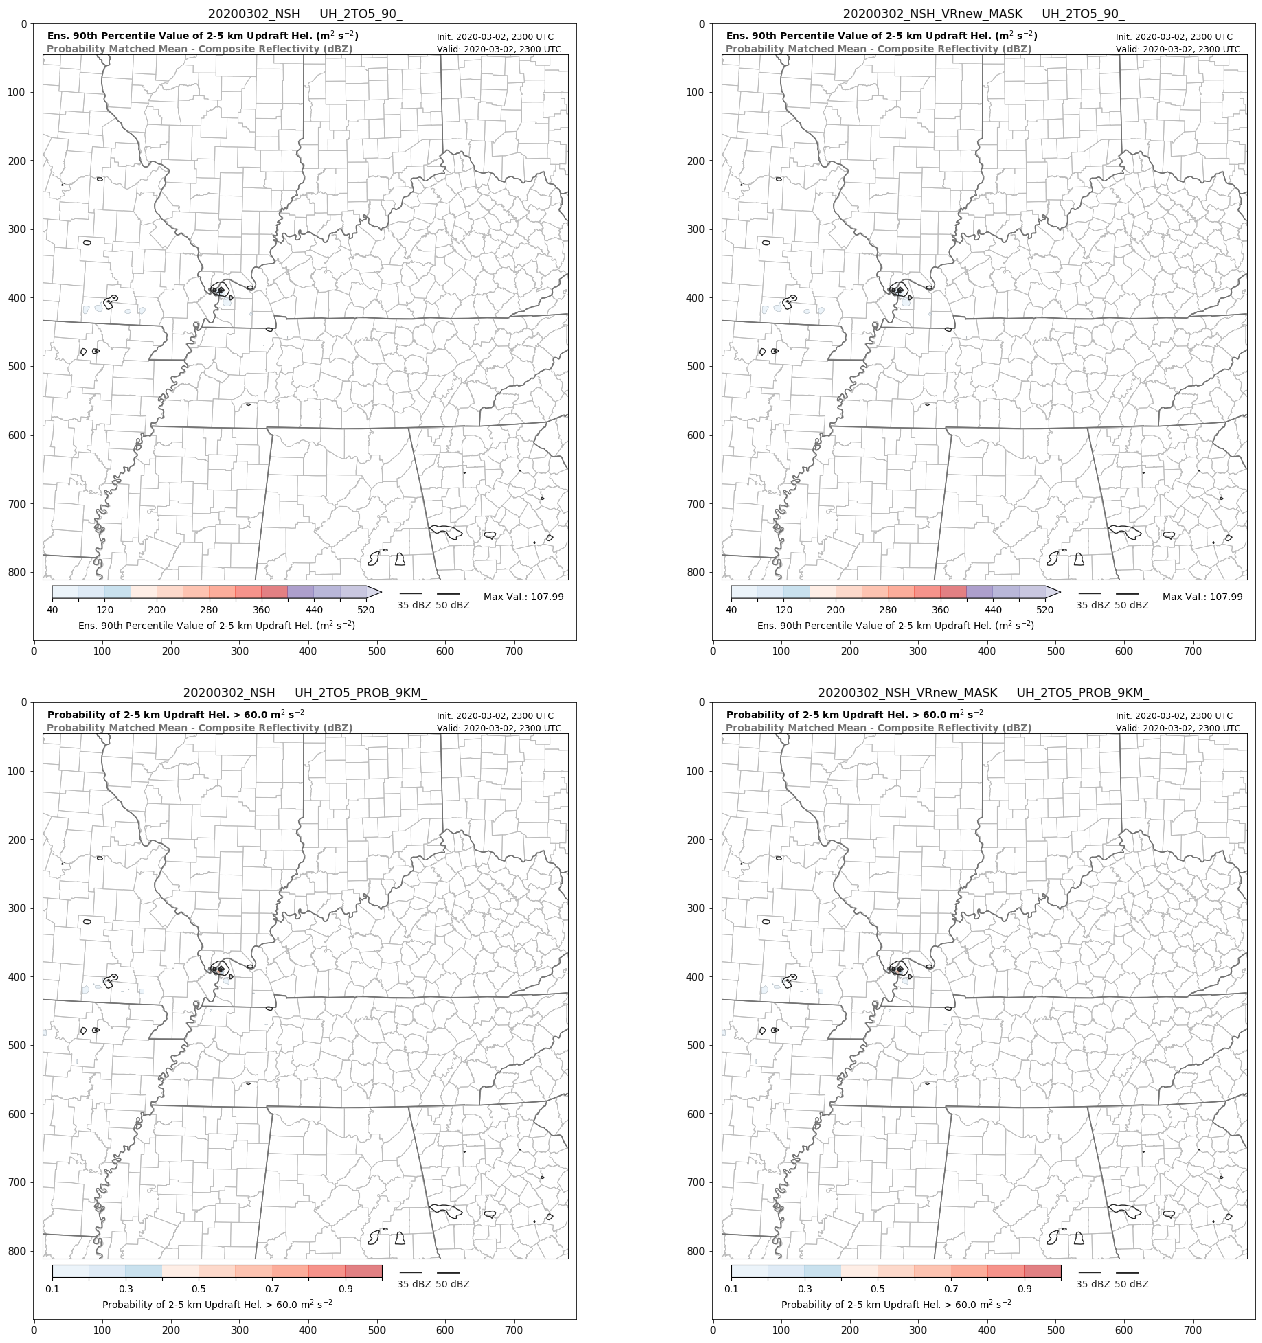

In [397]:
rundirs   = ['/Users/Louis.Wicker/20200302_NSH','/Users/Louis.Wicker/20200302_NSH_VRnew_MASK' ]

plottypes = ['uh_2to5_90_f%3.3i.png', 'uh_2to5_prob_9km_f%3.3i.png']

#plottypes = ['uh_2to5_prob_9km_f%3.3i.png']


time   = 5*np.arange(10)
fhour  = '2300'

fig, axs = plt.subplots(len(plottypes), len(rundirs), figsize=(20, 10*len(plottypes)))

plt.subplots_adjust(top = 0.95, bottom = 0.05, right = 0.95, left = 0.05, hspace = 0.1, wspace = 0.1)

movie = plot_panel(time, fhour, rundirs, plottypes, axs = axs)

print(len(movie))

anim = manimation.FuncAnimation(fig, movie, interval=50, blit=True, repeat_delay=1000)


#anim.save('test.mp4', writer='ffmpeg')

0
60
120
180
240
300
360


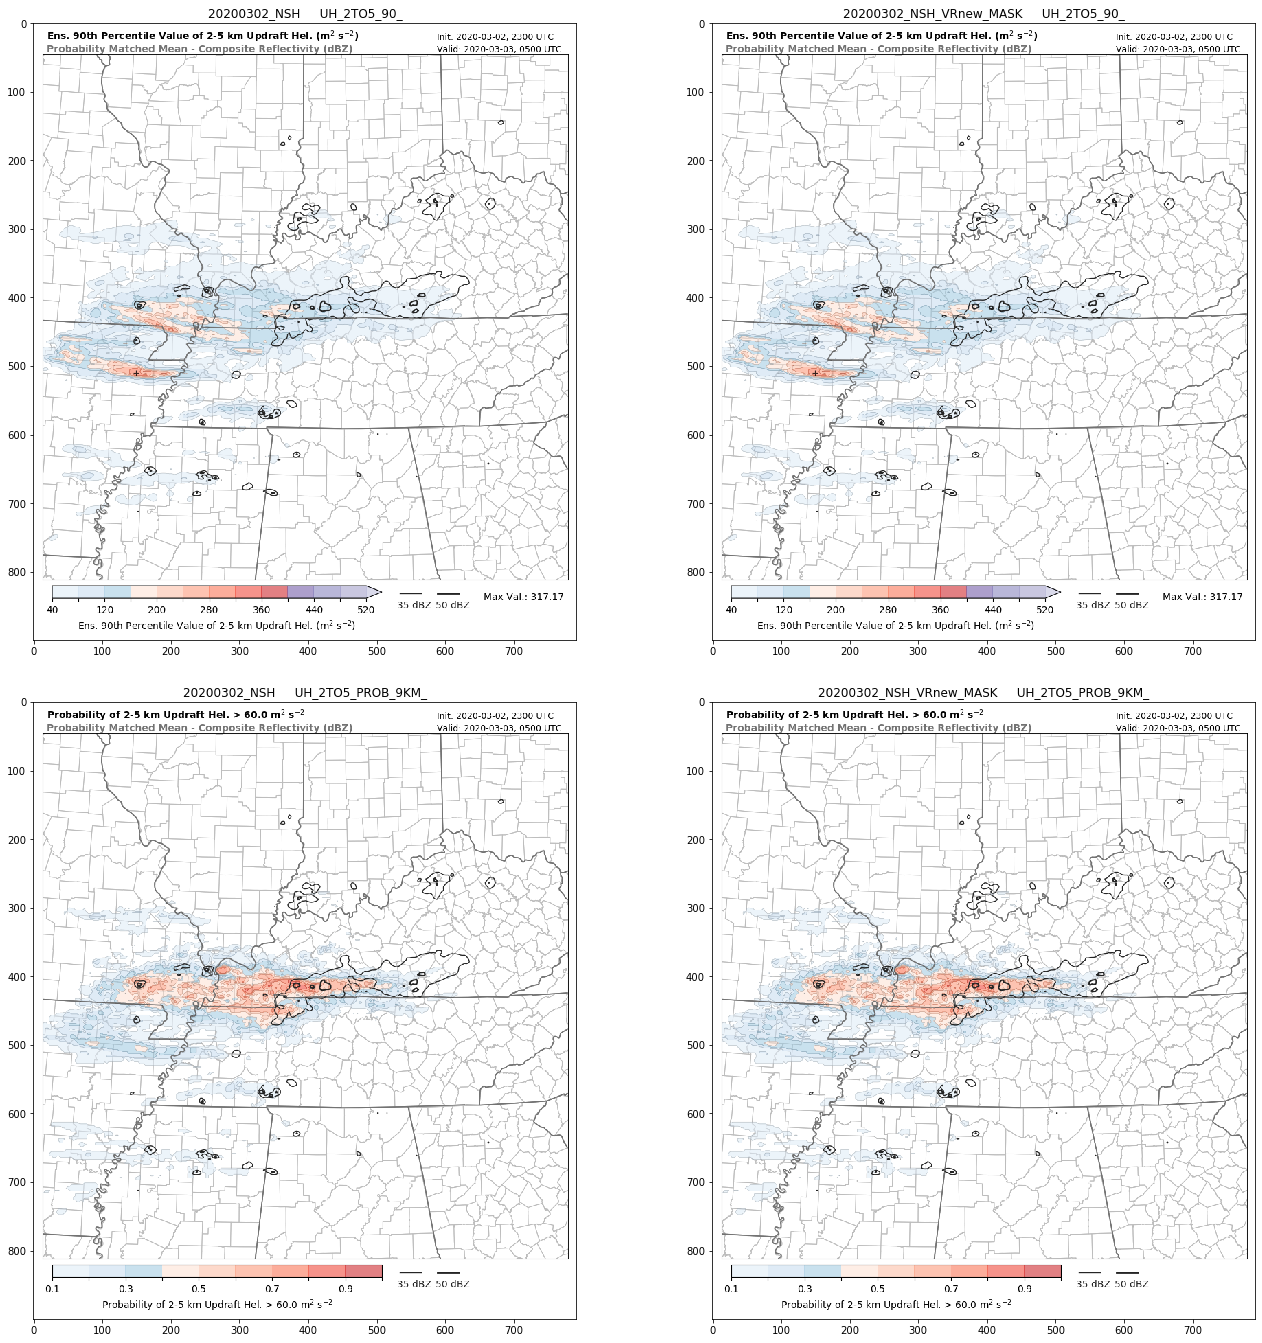

In [374]:
rundirs   = ['/Users/Louis.Wicker/20200302_NSH','/Users/Louis.Wicker/20200302_NSH_VRnew_MASK' ]

plottypes = ['uh_2to5_90_f%3.3i.png', 'uh_2to5_prob_9km_f%3.3i.png']

#plottypes = ['uh_2to5_prob_9km_f%3.3i.png']


time   = 5*np.arange(73)
fhour  = '2300'

metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')
writer = manimation.FFMpegWriter(fps=10, metadata=metadata, codec='libx264')

fig, axs = plt.subplots(len(plottypes), len(rundirs), figsize=(20, 10*len(plottypes)))

plt.subplots_adjust(top = 0.95, bottom = 0.05, right = 0.95, left = 0.05, hspace = 0.1, wspace = 0.1)

with writer.saving(fig, "test4frame.mp4", 100):
    
    for t in time: 
        
        if t % 60 == 0: print(t)
            
        images     = []
        titles     = []
        plotlabels = []

        for ptype in plottypes:

            for dir in rundirs:

                images.append( read_png(dir, fhour, ptype, t) )
                titles.append(dir)
                plotlabels.append(ptype[:-10].upper())

        for index, ax in enumerate(axs.flat):
            ax.clear()
            ax.imshow(images[index])
            ax.set_title('%s     %s' %(os.path.split(titles[index])[-1], plotlabels[index]))
        
        writer.grab_frame()



In [398]:
def video(fname, mimetype):
    from IPython.display import HTML
    video_encoded = open(fname, "rb").read().encode("base64")
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

vid = video("writer_test.mp4", "mp4")

AttributeError: 'bytes' object has no attribute 'encode'

In [399]:
from IPython.display import Video


In [402]:
%%HTML
<video width="640" height="900" controls>
  <source src=Video("test4frame.mp4") type="video/mp4">
</video>